# PyHack - Setup DataFrame

## Import Dependencies

In [478]:
# Import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import seaborn as sns

# Set DPI of all Plots
plt.rcParams["figure.dpi"] = 150

# Set Dark Grid for all Plots
sns.set_style('darkgrid')

# File to Load
data_breaches_csv = Path("../Resources/balloon_race_data_breaches.csv")
data_breaches_countries_csv = Path("../Resources/databreach_country_coords.xls")

## Import Data to Pandas DataFrames

In [479]:
# Import Data from CSV files as Pandas DataFrames
dBreaches_df = pd.read_csv(data_breaches_csv)
dBreaches_location_df = pd.read_excel(data_breaches_countries_csv)

In [480]:
# Print the First 3 Rows of dBreaches DataFrame
dBreaches_df.head(3)

,organisation,alternative name,records lost,year,date,story,sector,method,interesting story,data sensitivity,displayed records,Unnamed: 11,source name,1st source link,2nd source link,ID
0,Plex,NaN,"15,000,000",2022,Aug-22,"Intruders access password data, usernames, and...",web,hacked,NaN,1.0,NaN,NaN,Ars technica,https://arstechnica.com/information-technology...,NaN,418
1,Twitter,NaN,"5,400,000",2021,Dec-21,Zero day vulnerability allowed a threat actor ...,web,hacked,NaN,2.0,NaN,NaN,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,NaN,419
2,Shanghai Police,NaN,"500,000,000",2022,Jul-22,A database containing records of over a billio...,financial,hacked,NaN,5.0,"""one billion""",NaN,The Register,https://www.theregister.com/2022/07/05/shangha...,NaN,420


In [481]:
# Print the First 3 Rows of dBreaches_location DataFrame
dBreaches_location_df.head(3)

,organisation,"Location, Latitude, Longitude"
0,Plex,"Los Gatos, USA, 37.2350, -121.9629"
1,Twitter,"San Francisco, USA, 37.7749, -122.4194"
2,Shanghai Police,"Shanghai, China, 31.2304, 121.4737"


## Clean dBreaches_location_df

In [482]:
# Split the single Column by comma to extract City, Country, Latitude and Longitude
dBreaches_location_df[['city', 'country', 'latitude', 'longitude']] = dBreaches_location_df['Location, Latitude, Longitude'].str.split(',', expand=True)

In [483]:
# Drop the Combined Column
dBreaches_location_df = dBreaches_location_df.drop('Location, Latitude, Longitude', axis=1)

In [484]:
# Drop Duplicate Rows from dBreaches_location_df
dBreaches_location_df = dBreaches_location_df.drop_duplicates()

In [485]:
# Strip preceding white space from dBreaches_location_df
dBreaches_location_df['latitude'] = dBreaches_location_df['latitude'].str.strip()
# Strip preceding white space from dBreaches_location_df
dBreaches_location_df['longitude'] = dBreaches_location_df['longitude'].str.strip()

In [486]:
# Drop Rows lacking Latitude value
dBreaches_location_df = dBreaches_location_df[dBreaches_location_df["latitude"].str.contains("N/A") == False]

In [487]:
# Change latitude and longitude Column to integer data type
dBreaches_location_df['latitude'] = dBreaches_location_df['latitude'].astype(float)
dBreaches_location_df['longitude'] = dBreaches_location_df['longitude'].astype(float)

In [488]:
# Check DataFrame
dBreaches_location_df

,organisation,city,country,latitude,longitude
0,Plex,Los Gatos,USA,37.235000,-121.962900
1,Twitter,San Francisco,USA,37.774900,-122.419400
2,Shanghai Police,Shanghai,China,31.230400,121.473700
3,"City of Amagasaki, Japan",Amagasaki,Japan,34.730300,135.579500
5,Heroku,San Francisco,USA,37.774900,-122.419400
...,...,...,...,...,...
410,Automatic Data Processing,Roseland,USA,40.820100,-74.302400
411,KDDI,Tokyo,Japan,35.682839,139.759455
412,Hewlett Packard,Palo Alto,USA,37.441900,-122.143000
413,Ameritrade Inc.,Omaha,USA,41.256500,-95.934500


In [489]:
# Create Coordinates Column for GeoJSON Compatibility
dBreaches_location_df['coordinates'] = dBreaches_location_df[['latitude', 'longitude']].apply(list, axis=1)

In [490]:
# Check Unique Countries
dBreaches_location_df['country'].unique()

array([' USA', ' China', ' Japan', ' Sri Lanka', ' Russia',
       ' Switzerland', ' Canada', ' Indonesia', ' Taiwan',
       ' United Kingdom', ' South Africa', ' India', ' Estonia',
       ' Germany', ' Brazil', ' France', ' Italy', ' Sweden',
       ' Netherlands', ' Israel', ' Australia', ' Bulgaria',
       ' South Korea', ' Singapore', ' Hong Kong', ' Belgium', ' USA.',
       ' United Arab Emirates', ' Norway', ' Panama', ' Philippines',
       ' Syria', " United Arab Emirates (although it's developed by)",
       ' Luxembourg', " USA (Experian's North American headquarters)",
       ' Serbia', ' Turkey', ' Greece', ' Puerto Rico', ' Chile'],
      dtype=object)

In [491]:
# Strip preceding white space from each Country
dBreaches_location_df['country'] = dBreaches_location_df['country'].str.strip()

In [492]:
# Correct Country List
dBreaches_location_df['country'] = dBreaches_location_df['country'].replace("USA (Experian's North American headquarters)", 'USA')
dBreaches_location_df['country'] = dBreaches_location_df['country'].replace('USA.', 'USA')
dBreaches_location_df['country'] = dBreaches_location_df['country'].replace("United Arab Emirates (although it's developed by)", 'United Arab Emirates')

In [493]:
# Check Unique Cities
dBreaches_location_df['city'].unique()

array(['Los Gatos', 'San Francisco', 'Shanghai', 'Amagasaki', 'Atlanta',
       'Colombo', 'Novosibirsk', 'Olympia', 'Geneva', 'Calgary', 'Tokyo',
       'Menlo Park', 'Scottsdale', 'Jakarta', 'New Taipei City', 'Ellon',
       'Santa Clara', 'Johannesburg', 'Chennai', 'Seattle', 'Tampa',
       'Dallas', 'Sammamish', 'Bellevue', 'Tallinn', 'Chichester',
       'Sunnyvale', 'Wolfsburg', 'Chicago', 'New Delhi', 'New York City',
       'Denver', 'São Paulo', 'Philadelphia', 'Frankfurt', 'Paris',
       'Manchester', 'Austin', 'Rome', 'Stockholm', 'Boston',
       'Lake Worth', 'Santa Monica', 'Shenzhen', 'Kyoto', 'Arlington',
       'London', 'Redmond', 'The Hague', 'Hook', 'Nottingham',
       'Welwyn Garden City', 'Bethesda', 'San Jose', 'Jerusalem',
       'Las Vegas', 'Regensburg', 'Wawa', 'Lévis', 'Washington',
       'Secaucus', 'Canberra', 'Sydney', 'Mumbai', 'Toyota City',
       'Palo Alto', 'Los Angeles', 'Berlin', 'Irvine', 'Moscow',
       'Gurugram', 'Israel', 'Bellingham', 

In [494]:
# Check City Value Counts
dBreaches_location_df['city'].value_counts()

New York City    22
London           21
San Francisco    18
Atlanta           9
Tokyo             8
                 ..
Toyota City       1
Mumbai            1
Sydney            1
Secaucus          1
Roseland          1
Name: city, Length: 181, dtype: int64

In [495]:
# Drop Rows containing non-city names in City Column
dBreaches_location_df = dBreaches_location_df[dBreaches_location_df["city"].str.contains("No State/Country Info found") == False]
dBreaches_location_df = dBreaches_location_df[dBreaches_location_df["city"].str.contains("No specific headquarters") == False]

In [496]:
# Check Data Types
dBreaches_location_df.dtypes

organisation     object
city             object
country          object
latitude        float64
longitude       float64
coordinates      object
dtype: object

In [497]:
# Check for NaNs
dBreaches_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 415
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   organisation  333 non-null    object 
 1   city          333 non-null    object 
 2   country       333 non-null    object 
 3   latitude      333 non-null    float64
 4   longitude     333 non-null    float64
 5   coordinates   333 non-null    object 
dtypes: float64(2), object(4)
memory usage: 18.2+ KB


## Clean dBreaches_df

In [498]:
# Standardise Header Row
dBreaches_df.columns = dBreaches_df.columns.str.lower()

In [499]:
# Check Column Headers
dBreaches_df.columns

Index(['organisation', 'alternative name', 'records lost', 'year   ', 'date',
       'story', 'sector', 'method', 'interesting story', 'data sensitivity',
       'displayed records', 'unnamed: 11', 'source name', '1st source link',
       '2nd source link', 'id'],
      dtype='object')

In [500]:
# Drop Duplicates Rows from dBreaches_df
dBreaches_df = dBreaches_df.drop_duplicates()

In [501]:
# Drop id Column
dBreaches_df = dBreaches_df.drop('id', axis=1)

In [502]:
# Create New Unique id Column
dBreaches_df['id'] = range(1, len(dBreaches_df) + 1)

In [503]:
# Drop unnamed Column
dBreaches_df = dBreaches_df.drop('unnamed: 11', axis=1)

# Split date Column to extract Month
dBreaches_df[['date', 'temp']] = dBreaches_df['date'].str.split('-', expand=True)

# Split sector Column to separate into sector and secondary sector
dBreaches_df[['sector', 'secondary sector']] = dBreaches_df['sector'].str.split(',', expand=True)

In [504]:
# Drop Temporary Column
dBreaches_df = dBreaches_df.drop('temp', axis=1)

# Drop 2nd source link Column
dBreaches_df = dBreaches_df.drop('2nd source link', axis=1)

# Rename date Column
dBreaches_df = dBreaches_df.rename(columns={"date": "month"})

# Rename 'year   ' Column
dBreaches_df = dBreaches_df.rename(columns={"year   ": "year"})

# Rename 1st source link Column
dBreaches_df = dBreaches_df.rename(columns={"1st source link": "source link"})

# Replace oops! text in method Column
dBreaches_df['method'] = dBreaches_df['method'].replace('oops!', 'accident')

# Remove spaces from sector Column
dBreaches_df['sector'] = dBreaches_df['sector'].str.replace(' ', '')

In [505]:
# Remove all Digits from month Column
dBreaches_df['month'] = dBreaches_df['month'].str.replace('\d+', '')

/var/folders/_6/tq2832l10c75gwmjp1dpv9bw0000gn/T/ipykernel_29289/2835065297.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dBreaches_df['month'] = dBreaches_df['month'].str.replace('\d+', '')


In [506]:
# Check Column Headers
dBreaches_df.columns

Index(['organisation', 'alternative name', 'records lost', 'year', 'month',
       'story', 'sector', 'method', 'interesting story', 'data sensitivity',
       'displayed records', 'source name', 'source link', 'id',
       'secondary sector'],
      dtype='object')

In [507]:
# Reorder and Drop Columns 
dBreaches_df = dBreaches_df[['id', 'organisation', 'records lost', 'month', 'year',\
                             'sector', 'method', 'data sensitivity', 'story', 'source name', 'source link']]

In [508]:
# Check Structure of DataFrame
dBreaches_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 416
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                417 non-null    int64  
 1   organisation      417 non-null    object 
 2   records lost      417 non-null    object 
 3   month             417 non-null    object 
 4   year              417 non-null    int64  
 5   sector            417 non-null    object 
 6   method            417 non-null    object 
 7   data sensitivity  416 non-null    float64
 8   story             411 non-null    object 
 9   source name       417 non-null    object 
 10  source link       416 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 39.1+ KB


In [509]:
# Drop Rows containing NaNs from Merged DataFrame
dBreaches_df = dBreaches_df.dropna()

In [510]:
# Check Data Types of Each Column
dBreaches_df.dtypes

id                    int64
organisation         object
records lost         object
month                object
year                  int64
sector               object
method               object
data sensitivity    float64
story                object
source name          object
source link          object
dtype: object

In [511]:
# Remove Non-Digit Characters in 'records lost' Column
dBreaches_df['records lost'] = dBreaches_df['records lost'].str.replace(r'\D+', '')


/var/folders/_6/tq2832l10c75gwmjp1dpv9bw0000gn/T/ipykernel_29289/1561325110.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dBreaches_df['records lost'] = dBreaches_df['records lost'].str.replace(r'\D+', '')


In [512]:
# Change 'records lost' and 'data sensitivity' Columns to integer data type
dBreaches_df['records lost'] = dBreaches_df['records lost'].astype(int)
dBreaches_df['data sensitivity'] = dBreaches_df['data sensitivity'].astype(int)


In [513]:
# Check Data Types of Each Column again
dBreaches_df.dtypes

id                   int64
organisation        object
records lost         int64
month               object
year                 int64
sector              object
method              object
data sensitivity     int64
story               object
source name         object
source link         object
dtype: object

In [514]:
# Check Data Breach Method Column
dBreaches_df['method'].unique()

array(['hacked', 'accident', 'inside job', 'poor security',
       'poor security ', 'lost device', 'lost device '], dtype=object)

In [515]:
# Remove White Space from method Column
dBreaches_df['method'] = dBreaches_df['method'].str.strip()

In [516]:
# Check DataFrame
dBreaches_df

,id,organisation,records lost,month,year,sector,method,data sensitivity,story,source name,source link
0,1,Plex,15000000,Aug,2022,web,hacked,1,"Intruders access password data, usernames, and...",Ars technica,https://arstechnica.com/information-technology...
1,2,Twitter,5400000,Dec,2021,web,hacked,2,Zero day vulnerability allowed a threat actor ...,Bleeping Computer,https://www.bleepingcomputer.com/news/security...
2,3,Shanghai Police,500000000,Jul,2022,financial,hacked,5,A database containing records of over a billio...,The Register,https://www.theregister.com/2022/07/05/shangha...
3,4,"City of Amagasaki, Japan",500000,Jun,2022,government,accident,3,An unnamed government official lost his bag af...,BBC,https://www.bbc.co.uk/news/world-asia-61921222
4,5,Dubai Real Estate Leak,800000,May,2022,financial,inside job,1,"Data leak exposes how criminals, officials, an...",E24,https://e24.no/internasjonal-oekonomi/i/Bj97B0...
...,...,...,...,...,...,...,...,...,...,...,...
412,413,Hewlett Packard,200000,Mar,2006,tech,lost device,2,A laptop containing employee data was either l...,Computer Weekly,https://www.computerweekly.com/news/2240076956...
413,414,Ameritrade Inc.,200000,Apr,2005,finance,lost device,2,A computer backup tape containing the personal...,NBC,http://www.nbcnews.com/id/7561268/
414,415,Citigroup,3900000,Jun,2005,finance,lost device,3,A box of computer tapes containing information...,NY Times,http://www.nytimes.com/2005/06/07/business/07d...
415,416,Cardsystems Solutions Inc.,40000000,Jun,2005,finance,hacked,3,An unauthorized entity enabled access to cusom...,Wired,https://www.wired.com/2005/06/cardsystems-data...


## Merge DataFrames

In [517]:
# Merge DataFrames
merged_dBreaches_df = dBreaches_df.merge(dBreaches_location_df,on=['organisation'])

In [518]:
# Check Merged DataFrame
merged_dBreaches_df.head()

,id,organisation,records lost,month,year,sector,method,data sensitivity,story,source name,source link,city,country,latitude,longitude,coordinates
0,1,Plex,15000000,Aug,2022,web,hacked,1,"Intruders access password data, usernames, and...",Ars technica,https://arstechnica.com/information-technology...,Los Gatos,USA,37.2350,-121.9629,"[37.235, -121.9629]"
1,2,Twitter,5400000,Dec,2021,web,hacked,2,Zero day vulnerability allowed a threat actor ...,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,San Francisco,USA,37.7749,-122.4194,"[37.7749, -122.4194]"
2,148,Twitter,330000000,May,2018,tech,poor security,1,A glitch caused some passwords to be stored in...,Reuters,https://www.reuters.com/article/us-twitter-pas...,San Francisco,USA,37.7749,-122.4194,"[37.7749, -122.4194]"
3,273,Twitter,250000,Feb,2013,web,hacked,1,A Java vulnerability gave hackers access to so...,CNN,https://edition.cnn.com/2013/02/01/tech/social...,San Francisco,USA,37.7749,-122.4194,"[37.7749, -122.4194]"
4,3,Shanghai Police,500000000,Jul,2022,financial,hacked,5,A database containing records of over a billio...,The Register,https://www.theregister.com/2022/07/05/shangha...,Shanghai,China,31.2304,121.4737,"[31.2304, 121.4737]"


In [519]:
# Drop Rows containing NaNs from Merged DataFrame
cleaned_dBreaches_df = merged_dBreaches_df.dropna()

In [520]:
# Drop Duplicate Rows
cleaned_dBreaches_df = cleaned_dBreaches_df.drop_duplicates(subset=['id'])

In [521]:
# Check Cleaned Merged DataFrame
cleaned_dBreaches_df

,id,organisation,records lost,month,year,sector,method,data sensitivity,story,source name,source link,city,country,latitude,longitude,coordinates
0,1,Plex,15000000,Aug,2022,web,hacked,1,"Intruders access password data, usernames, and...",Ars technica,https://arstechnica.com/information-technology...,Los Gatos,USA,37.235000,-121.962900,"[37.235, -121.9629]"
1,2,Twitter,5400000,Dec,2021,web,hacked,2,Zero day vulnerability allowed a threat actor ...,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,San Francisco,USA,37.774900,-122.419400,"[37.7749, -122.4194]"
2,148,Twitter,330000000,May,2018,tech,poor security,1,A glitch caused some passwords to be stored in...,Reuters,https://www.reuters.com/article/us-twitter-pas...,San Francisco,USA,37.774900,-122.419400,"[37.7749, -122.4194]"
3,273,Twitter,250000,Feb,2013,web,hacked,1,A Java vulnerability gave hackers access to so...,CNN,https://edition.cnn.com/2013/02/01/tech/social...,San Francisco,USA,37.774900,-122.419400,"[37.7749, -122.4194]"
4,3,Shanghai Police,500000000,Jul,2022,financial,hacked,5,A database containing records of over a billio...,The Register,https://www.theregister.com/2022/07/05/shangha...,Shanghai,China,31.230400,121.473700,"[31.2304, 121.4737]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,410,US Dept of Vet Affairs,26500000,Jul,2006,government,lost device,2,The Veterans Affairs Department agreed to pay ...,"GCN, US Gov",http://gcn.com/Articles/2009/02/02/VA-data-bre...,Washington,USA,47.751100,-120.740100,"[47.7511, -120.7401]"
341,411,Automatic Data Processing,125000,Jul,2006,finance,poor security,2,"Automatic Data Processing, one of the world's ...",ABC News,http://abcnews.go.com/Technology/story?id=2160...,Roseland,USA,40.820100,-74.302400,"[40.8201, -74.3024]"
342,412,KDDI,4000000,Jun,2006,telecoms,hacked,1,Tokyo police arrested two men for trying to ex...,Computer World,http://www.computerworld.com/s/article/9001150...,Tokyo,Japan,35.682839,139.759455,"[35.682839, 139.759455]"
343,413,Hewlett Packard,200000,Mar,2006,tech,lost device,2,A laptop containing employee data was either l...,Computer Weekly,https://www.computerweekly.com/news/2240076956...,Palo Alto,USA,37.441900,-122.143000,"[37.4419, -122.143]"


## Exploratory Data Analysis

In [522]:
# Method Value Count
method_count = cleaned_dBreaches_df['method'].value_counts()
method_count

hacked           232
lost device       43
poor security     32
accident          18
inside job        15
Name: method, dtype: int64

In [523]:
# Records Lost by Data Breach Methods
methods_groupby = cleaned_dBreaches_df.groupby(['method'])['records lost'].describe()
methods_groupby

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
accident,18.0,4.447413e+06,6.785052e+06,30.0,500000.0,2200000.0,5142797.0,24000000.0
hacked,232.0,3.681171e+07,9.794314e+07,1025.0,675000.0,4500000.0,24150000.0,700000000.0
inside job,15.0,1.059109e+07,2.316554e+07,89000.0,1250000.0,2500000.0,8568702.5,92000000.0
lost device,43.0,3.085624e+06,5.905809e+06,34000.0,170055.5,800000.0,3150000.0,26500000.0
poor security,32.0,7.644459e+07,1.362419e+08,50000.0,975000.0,10250000.0,64375000.0,550000000.0


In [524]:
# Sector Value Count
sector_count = cleaned_dBreaches_df['sector'].value_counts()
sector_count

web           88
health        37
retail        36
government    35
finance       34
tech          18
telecoms      18
app           16
transport     15
gaming        15
misc          11
academic      11
financial      3
NGO            1
legal          1
military       1
Name: sector, dtype: int64

In [525]:
# Data sensitivity Value Count
data_sensitivity_count = cleaned_dBreaches_df['data sensitivity'].value_counts()
data_sensitivity_count

1    109
2    105
3     58
4     47
5     21
Name: data sensitivity, dtype: int64

In [526]:
# Check the Most Serious Data Breaches (i.e Data Sensitivity of 5)
serious_breaches = cleaned_dBreaches_df.loc[cleaned_dBreaches_df['data sensitivity'] == 5]
serious_breaches

,id,organisation,records lost,month,year,sector,method,data sensitivity,story,source name,source link,city,country,latitude,longitude,coordinates
4,3,Shanghai Police,500000000,Jul,2022,financial,hacked,5,A database containing records of over a billio...,The Register,https://www.theregister.com/2022/07/05/shangha...,Shanghai,China,31.2304,121.4737,"[31.2304, 121.4737]"
26,30,Epik,15000000,Sep,2021,retail,hacked,5,An Internet-services company for concealing on...,Ars Technica,https://arstechnica.com/information-technology...,Sammamish,USA,47.6163,-122.0356,"[47.6163, -122.0356]"
57,58,GEDmatch,1400000,Sep,2020,misc,hacked,5,DNA data on up to 1.4m users of this geneaolog...,New York Times,https://www.nytimes.com/2020/08/01/technology/...,Lake Worth,USA,26.6168,-80.0684,"[26.6168, -80.0684]"
83,87,Vårdguiden,2700000,Feb,2019,health,poor security,5,"170,000 hours of sensitive calls to Sweden's h...",ComputerSweden,https://computersweden.idg.se/2.2683/1.714787/...,Stockholm,Sweden,59.3293,18.0686,"[59.3293, 18.0686]"
109,115,Suprema,27800000,Aug,2019,tech,poor security,5,A biometric security company stored unencrypte...,Guardian,https://www.theguardian.com/technology/2019/au...,Seoul,South Korea,37.5665,126.9780,"[37.5665, 126.978]"
131,142,Firebase,100000000,Jun,2018,app,poor security,5,Misconfigured databases used by app developers...,Bleeping Computer,https://www.bleepingcomputer.com/news/security...,San Francisco,USA,37.7749,-122.4194,"[37.7749, -122.4194]"
153,173,Swedish Transport Agency,3000000,Jul,2017,government,poor security,5,All Swedish driving license data was made avai...,The Local,https://www.thelocal.se/20170717/swedish-autho...,Borlänge,Sweden,60.4849,15.4251,"[60.4849, 15.4251]"
164,190,Mossack Fonseca,11500000,Apr,2016,misc,hacked,5,A hacker took 2.6TB of data from the Panamania...,PanamaPapers,http://panamapapers.sueddeutsche.de/articles/5...,Panama City,Panama,8.9824,-79.5199,"[8.9824, -79.5199]"
165,191,Philippines’ Commission on Elections,55000000,Apr,2016,government,hacked,5,After a message was posted on the COMELEC webs...,Trend Micro,http://blog.trendmicro.com/trendlabs-security-...,Manila,Philippines,14.5995,120.9842,"[14.5995, 120.9842]"
174,204,Mutuelle Generale de la Police,112000,Jun,2016,health,inside job,5,Personal details of French police officers wer...,BBC News,http://www.bbc.co.uk/news/world-europe-36645519,Paris,France,48.8566,2.3522,"[48.8566, 2.3522]"


In [527]:
# Sector Records Lost Summary
sector_groupby = cleaned_dBreaches_df.groupby('sector')['records lost'].describe()
sector_groupby

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
NGO,1.0,5.000000e+05,NaN,500000.0,500000.0,500000.0,5.000000e+05,500000.0
academic,11.0,5.411818e+05,8.201417e+05,43000.0,73500.0,146000.0,4.800000e+05,2200000.0
app,16.0,3.148244e+07,4.967304e+07,309000.0,500000.0,2055000.0,5.175000e+07,150000000.0
finance,34.0,2.232497e+07,5.087761e+07,34000.0,325000.0,2550000.0,5.975000e+06,220000000.0
financial,3.0,1.688604e+08,2.867804e+08,1580249.0,3290593.0,5000937.0,2.525005e+08,500000000.0
gaming,15.0,1.496605e+07,2.255347e+07,200000.0,2645377.5,7000000.0,1.250000e+07,77000000.0
government,35.0,2.147778e+07,9.260192e+07,30.0,265738.5,3000000.0,6.250000e+06,550000000.0
health,37.0,2.500211e+06,4.036160e+06,34000.0,231400.0,1000000.0,3.000000e+06,20000000.0
legal,1.0,4.101101e+06,NaN,4101101.0,4101101.0,4101101.0,4.101101e+06,4101101.0


In [528]:
# Sector Data Sensitivity Summary
sector_sens_groupby = cleaned_dBreaches_df.groupby('sector')['data sensitivity'].describe()
sector_sens_groupby

,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
NGO,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
academic,11.0,2.545455,0.820200,2.0,2.00,2.0,3.00,4.0
app,16.0,2.000000,1.211060,1.0,1.00,2.0,2.25,5.0
finance,34.0,2.647059,1.124988,1.0,2.00,3.0,3.00,5.0
financial,3.0,3.333333,1.527525,2.0,2.50,3.0,4.00,5.0
gaming,15.0,1.733333,0.961150,1.0,1.00,1.0,2.00,4.0
government,35.0,2.571429,1.289909,1.0,2.00,2.0,3.50,5.0
health,37.0,3.405405,1.141623,1.0,2.00,4.0,4.00,5.0
legal,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0


In [529]:
# Sector + Data Sensitivity Summary
sector_sens_index = cleaned_dBreaches_df.groupby(['sector', 'data sensitivity'])['records lost'].describe()
sector_sens_index

count          mean           std          min  \
sector     data sensitivity                                                   
NGO        4                   1.0  5.000000e+05           NaN     500000.0   
academic   2                   7.0  1.847143e+05  2.561066e+05      43000.0   
           3                   2.0  1.130000e+06  1.371787e+06     160000.0   
           4                   2.0  1.200000e+06  1.414214e+06     200000.0   
app        1                   7.0  4.717143e+07  6.400083e+07     500000.0   
           2                   5.0  3.763800e+06  5.790264e+06     309000.0   
           3                   2.0  2.650000e+07  3.323402e+07    3000000.0   
           4                   1.0  1.700000e+06           NaN    1700000.0   
           5                   1.0  1.000000e+08           NaN  100000000.0   
finance    1                   6.0  3.458333e+06  2.434423e+06     450000.0   
           2                   9.0  2.719389e+07  7.243563e+07     125000.0   
           3                  12.0  2.703700e+07  4.671166e+07      34000.0   
           4                   5.0  2.952200e+07  6.344522e+07      40000.0   
           5                   2.0  1.075000e+07  1.308148e+07    1500000.0   
financial  2                   1.0  5.000937e+06           NaN    5000937.0   
           3                   1.0  1.580249e+06           NaN    1580249.0   
           5                   1.0  5.000000e+08           NaN  500000000.0   
gaming     1                   8.0  1.403750e+07  2.569502e+07     200000.0   
           2                   4.0  1.932269e+07  2.635780e+07    1290755.0   
           3                   2.0  1.245000e+07  1.718269e+07     300000.0   
           4                   1.0  1.000000e+07           NaN   10000000.0   
government 1                   5.0  6.994895e+06  1.036102e+07     100000.0   
           2                  19.0  4.005837e+06  6.105315e+06      50500.0   
           3                   2.0  3.785000e+05  1.718269e+05     257000.0   
           4                   4.0  1.392950e+08  2.738219e+08         30.0   
           5                   5.0  1.654000e+07  2.309509e+07    1500000.0   
health     1                   2.0  5.550000e+06  6.293250e+06    1100000.0   
           2                   9.0  1.771698e+06  1.900559e+06      93689.0   
           3                   2.0  2.800000e+06  1.272792e+06    1900000.0   
           4                  20.0  2.262526e+06  4.649674e+06      34000.0   
           5                   4.0  3.653000e+06  5.018795e+06     112000.0   
legal      1                   1.0  4.101101e+06           NaN    4101101.0   
military   3                   1.0  9.350000e+05           NaN     935000.0   
misc       1                   2.0  2.570000e+07  3.295118e+07    2400000.0   
           2                   5.0  4.928275e+06  5.168308e+06     471376.0   
           3                   2.0  1.155000e+06  1.477853e+06     110000.0   
           5                   2.0  6.450000e+06  7.141778e+06    1400000.0   
retail     1                   9.0  5.009712e+06  9.085169e+06     150000.0   
           2                  10.0  1.221910e+07  1.933991e+07      97000.0   
           3                  15.0  4.782528e+07  9.731915e+07       1025.0   
           4                   1.0  1.630000e+04           NaN      16300.0   
           5                   1.0  1.500000e+07           NaN   15000000.0   
tech       1                   9.0  1.208813e+08  1.942834e+08      50000.0   
           2                   4.0  4.812500e+06  7.580718e+06      50000.0   
           3                   3.0  1.466667e+07  2.023199e+07    2000000.0   
           4                   1.0  2.240000e+06           NaN    2240000.0   
           5                   1.0  2.780000e+07           NaN   27800000.0   
telecoms   1                   9.0  7.480778e+06  1.079941e+07     113000.0   
           2                   5.0  2.331400e+06  3.702476e+06     130000.0   


In [530]:
# Unique Sectors
cleaned_dBreaches_df['sector'].unique()

array(['web', 'tech', 'financial', 'government', 'retail', 'NGO', 'misc',
       'transport', 'legal', 'gaming', 'health', 'telecoms', 'app',
       'finance', 'academic', 'military'], dtype=object)

In [531]:
# Sector Value Counts
cleaned_dBreaches_df['sector'].value_counts()

web           88
health        37
retail        36
government    35
finance       34
tech          18
telecoms      18
app           16
transport     15
gaming        15
misc          11
academic      11
financial      3
NGO            1
legal          1
military       1
Name: sector, dtype: int64

In [532]:
# Records Lost by Country
country_groupby = cleaned_dBreaches_df.groupby('country')['records lost'].describe()
country_groupby

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Australia,4.0,3.493751e+07,6.937537e+07,30.0,150007.5,375000.0,3.516250e+07,139000000.0
Belgium,1.0,7.000000e+05,NaN,700000.0,700000.0,700000.0,7.000000e+05,700000.0
Brazil,2.0,1.260000e+08,1.329361e+08,32000000.0,79000000.0,126000000.0,1.730000e+08,220000000.0
Bulgaria,1.0,5.000000e+06,NaN,5000000.0,5000000.0,5000000.0,5.000000e+06,5000000.0
Canada,7.0,9.069000e+06,1.322808e+07,283000.0,1750000.0,3700000.0,9.500000e+06,37000000.0
Chile,1.0,6.000000e+06,NaN,6000000.0,6000000.0,6000000.0,6.000000e+06,6000000.0
China,4.0,1.371000e+08,2.425257e+08,2400000.0,5100000.0,23000000.0,1.550000e+08,500000000.0
Estonia,1.0,2.800000e+05,NaN,280000.0,280000.0,280000.0,2.800000e+05,280000.0
France,6.0,2.406367e+07,3.781313e+07,112000.0,217500.0,435000.0,4.365000e+07,85200000.0


In [533]:
# Most Breaches by Organisation
cleaned_dBreaches_df['organisation'].value_counts()

Facebook                  5
Citigroup                 3
Twitter                   3
AOL                       3
Yahoo                     3
                         ..
Saks and Lord & Taylor    1
MyHeritage                1
Dixons Carphone           1
Panerabread               1
Ameritrade Inc.           1
Name: organisation, Length: 319, dtype: int64

## Exploratory Visualisations

In [534]:
# Create Pivot Table of Number of Data Breaches by Method per Year
dBreaches_year_pivot = cleaned_dBreaches_df.pivot_table('id',
                                                        aggfunc=np.size,
                                                        columns='method',
                                                        index=cleaned_dBreaches_df['year'],
                                                        fill_value=0)
dBreaches_year_pivot

method,accident,hacked,inside job,lost device,poor security
year,,,,,
2004,0,0,1,0,0
2005,0,0,0,2,0
2006,1,1,0,2,1
2007,0,3,2,5,0
2008,1,4,4,10,0
2009,0,6,0,0,0
2010,0,3,0,6,0
2011,1,18,0,9,0
2012,1,11,2,3,0


<Axes: title={'center': 'Data Breach Methods Over Time'}, xlabel='year', ylabel='breaches'>

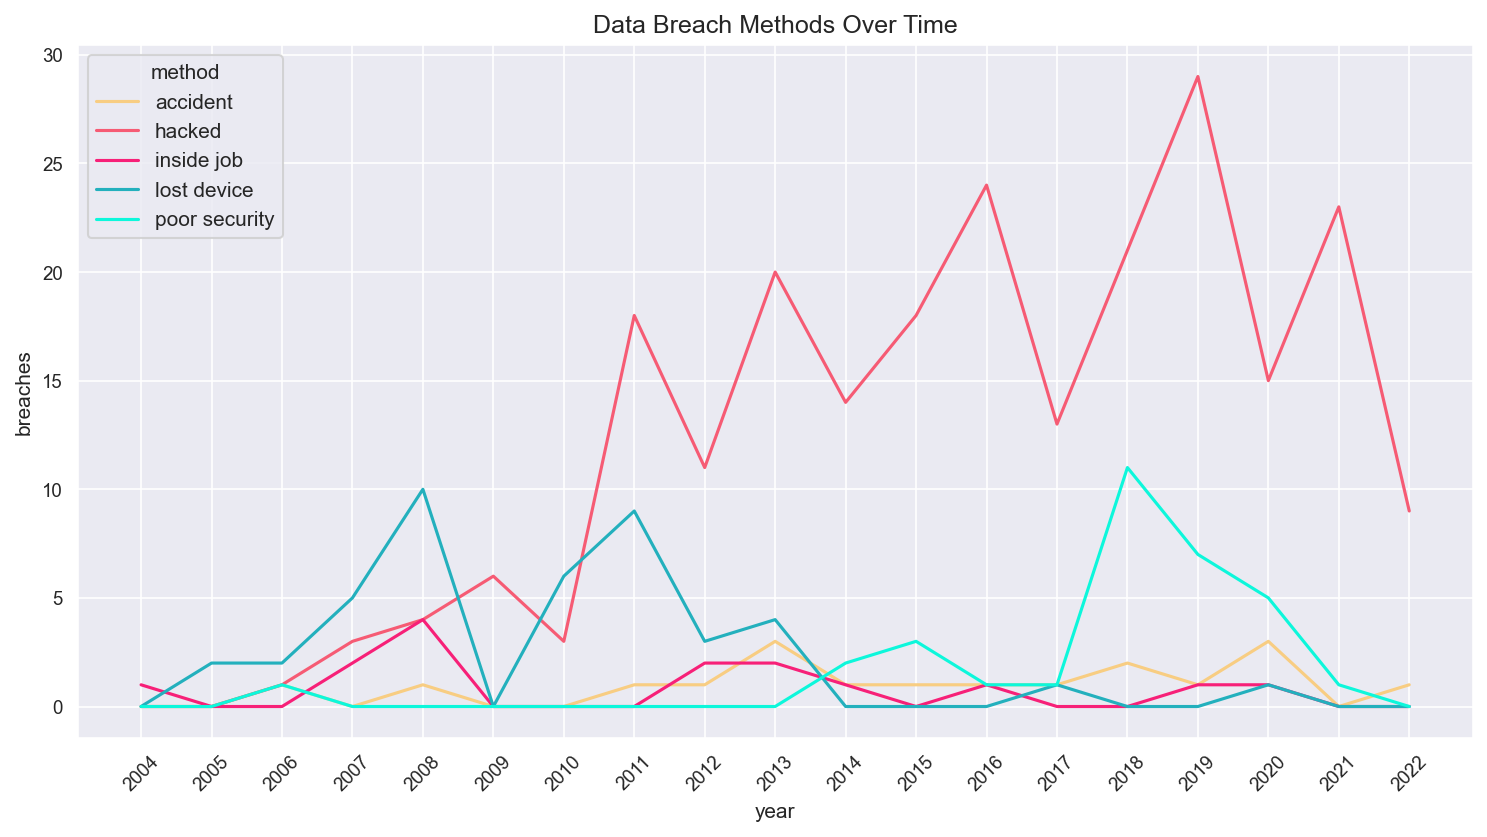

In [535]:
# Data Breach Methods Over Time (using pivot table)

# Set Colour Palette
#color = ['#730517', '#f44560', '#44d1df', '#32a4a7', '#1e7069']
color = ['#f8cd82', '#f65b74', '#f72078', '#23b0bd', '#0df7db']
#color = ['#a8216b', '#f1184c', '#f36943', '#f7dc66', '#2e9599']

# Create Pivot Table of Number of Data Breaches per Year
dBreaches_year_pivot = cleaned_dBreaches_df.pivot_table('id',
                                                   aggfunc=np.size,
                                                   columns='method',
                                                   index=cleaned_dBreaches_df['year'],
                                                   fill_value=0)

# Set Figure Parameters and Labels
dBreaches_year_pivot.plot(xticks=cleaned_dBreaches_df['year'].unique(),
                     rot=45,
                     figsize=(12,6),
                     subplots=False,
                     color = color,
                     layout=(1, 1),
                     sharex=False,
                     sharey=False,
                     xlabel='year',
                     ylabel="breaches",
                     title="Data Breach Methods Over Time",
                     fontsize=9)

array([[<Axes: xlabel='year', ylabel='breaches'>,
        <Axes: xlabel='year', ylabel='breaches'>,
        <Axes: xlabel='year', ylabel='breaches'>],
       [<Axes: xlabel='year', ylabel='breaches'>,
        <Axes: xlabel='year', ylabel='breaches'>,
        <Axes: xlabel='year', ylabel='breaches'>]], dtype=object)

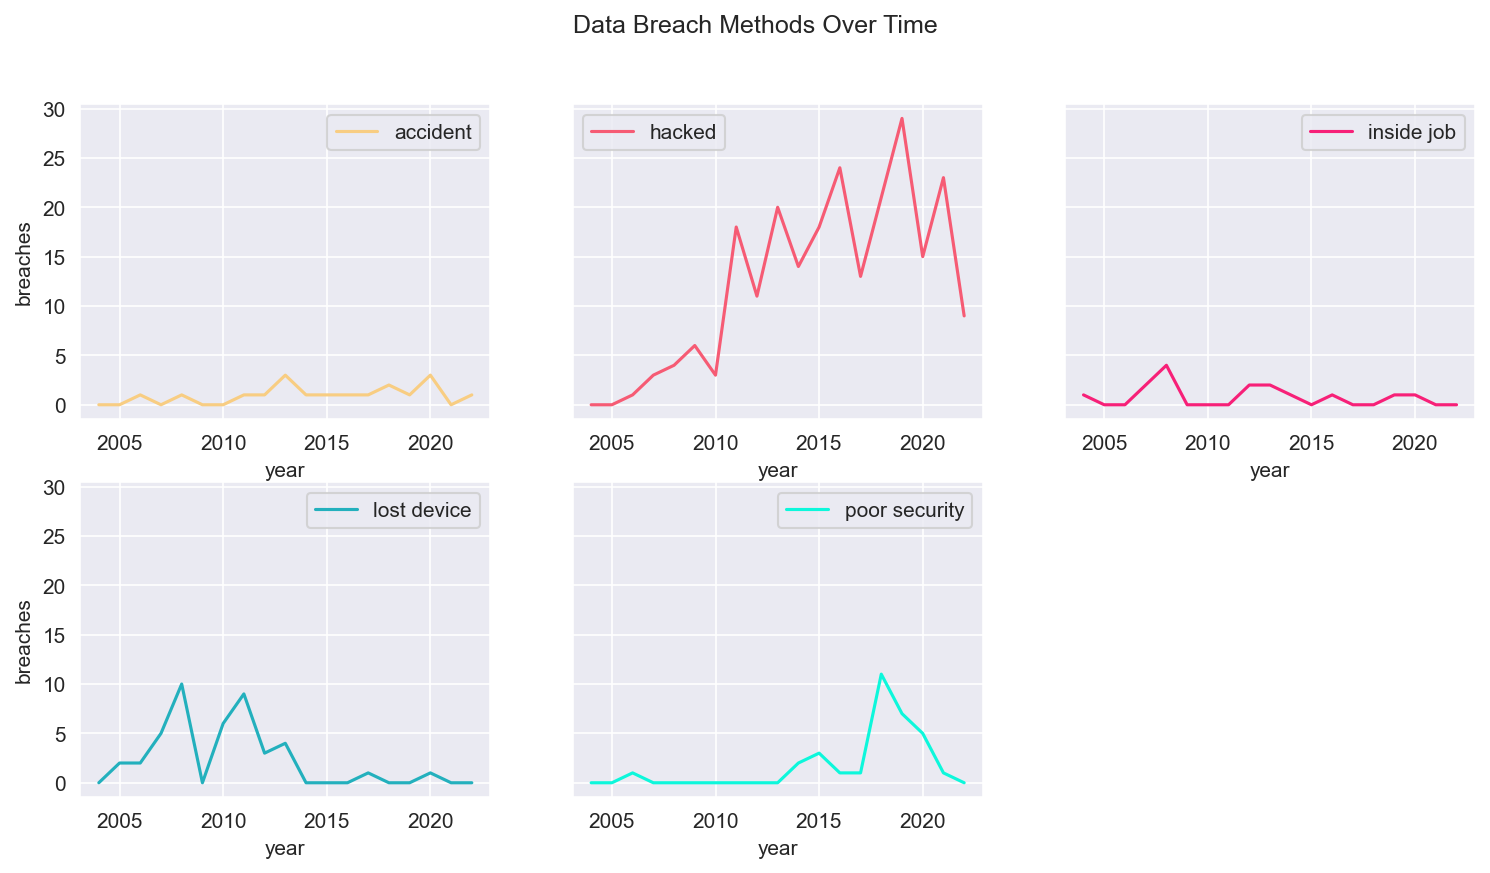

In [536]:
# Data Breach Methods Over Time (using Pivot Table) - Multiplots

# Set Colour Palette
#color = ['#730517', '#f44560', '#44d1df', '#32a4a7', '#1e7069']
color = ['#f8cd82', '#f65b74', '#f72078', '#23b0bd', '#0df7db']
#color = ['#a8216b', '#f1184c', '#f36943', '#f7dc66', '#2e9599']

# Create Pivot Table of Number of Data Breaches per Year
dBreaches_year_pivot = cleaned_dBreaches_df.pivot_table('id',
                                                   aggfunc=np.size,
                                                   columns='method',
                                                   index=cleaned_dBreaches_df['year'],
                                                   fill_value=0)

# Set Figure Parameters and Labels
dBreaches_year_pivot.plot(figsize=(12,6),
                     subplots=True,
                     color = color,
                     layout=(-1, 3),
                     sharex=False,
                     sharey=True,
                     xlabel='year',
                     ylabel="breaches",
                     title="Data Breach Methods Over Time")

In [537]:
# Create Pivot Table of Total Data Breaches by Method
dBreaches_pivot = cleaned_dBreaches_df.pivot_table('id',
                                                   aggfunc='count',
                                                   #columns='sector',
                                                   index=cleaned_dBreaches_df['method'],
                                                   fill_value=0)
dBreaches_pivot

,id
method,
accident,18
hacked,232
inside job,15
lost device,43
poor security,32


<Axes: title={'center': 'Data Breach Methods'}>

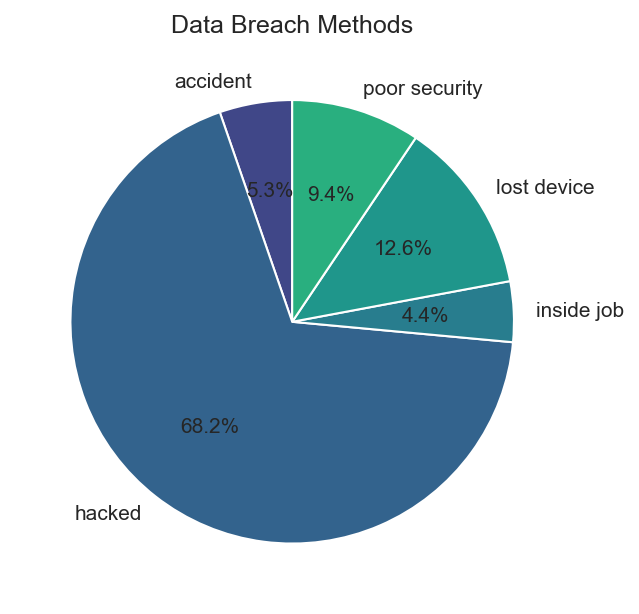

In [538]:
# Total Data Breaches by Method

# Set Colour Palette
#color = ['#730517', '#f44560', '#44d1df', '#32a4a7', '#1e7069']
#color = ['#f8cd82', '#f65b74', '#f72078', '#23b0bd', '#0df7db']
#color = ['#a8216b', '#f1184c', '#f36943', '#f7dc66', '#2e9599']
#color = ['#7d3ac1','#af4bce','#db4cb2','#eb548c','#ea7369','#f0a58f','#fceae6']
color = ['#404788','#33638d','#287d8e','#1f968b','#29af7f']

# Create Pivot Table of Total Data Breaches by Method
dBreaches_pivot = cleaned_dBreaches_df.pivot_table(values='id',
                                                   aggfunc='count',
                                                   #columns='method',
                                                   index=cleaned_dBreaches_df['method'],
                                                   fill_value=0)

# Set Figure Parameters and Labels
dBreaches_pivot.plot.pie(y='id', autopct='%1.1f%%', startangle=90, legend=False, title='Data Breach Methods', ylabel='', colors=color)
                     

In [539]:
# Create Pivot Table (Aggregate Function = Sum) of Breaches by Sector
dBreaches_sector_pivot = cleaned_dBreaches_df.pivot_table('id',
                                                          aggfunc=np.sum,
                                                          #columns='sector',
                                                          index='sector',
                                                          fill_value=0)
dBreaches_sector_pivot

,id
sector,
NGO,11
academic,3448
app,2114
finance,9392
financial,26
gaming,2981
government,8623
health,9901
legal,24


<Axes: title={'center': 'Total Records Lost'}, xlabel='records lost', ylabel='sector'>

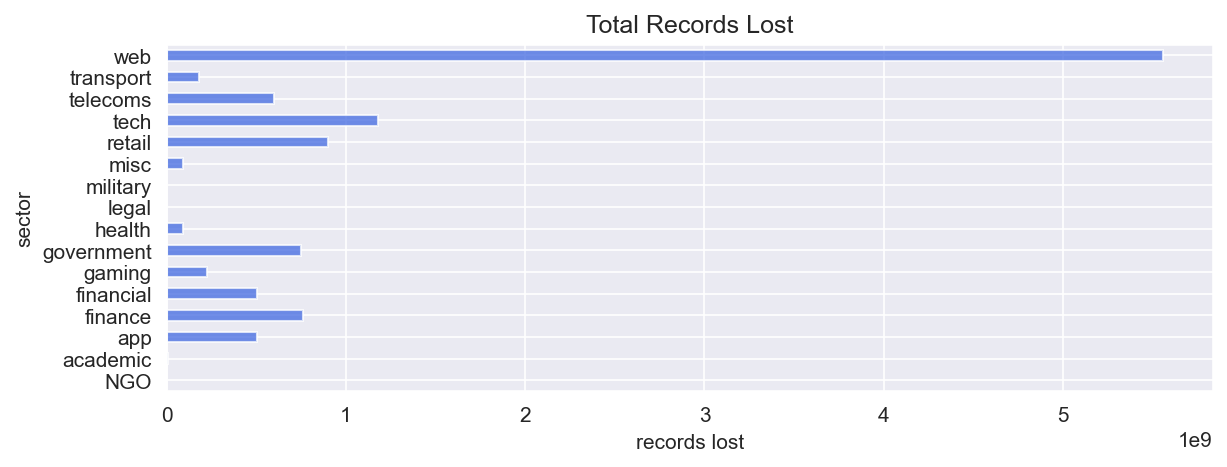

In [540]:
# Total Records Lost by Sector

# Set Colour Palette
#color = ['#730517', '#f44560', '#44d1df', '#32a4a7', '#1e7069']
color = ['#f8cd82', '#f65b74', '#f72078', '#23b0bd', '#0df7db']
#color = ['#a8216b', '#f1184c', '#f36943', '#f7dc66', '#2e9599']

# Create Pivot Table (Aggregate Function = Sum)
dBreaches_sector_pivot = cleaned_dBreaches_df.pivot_table('records lost',
                                                          aggfunc=np.sum,
                                                          #columns='data sensitivity',
                                                          index='sector',
                                                          fill_value=0)

# Set Figure Parameters and Labels
dBreaches_sector_pivot.plot.barh(figsize=(9,3),
                     subplots=False,
                     color = 'royalblue',
                     alpha=0.75,
                     layout=(-1, 3),
                     sharex=False,
                     sharey=False,
                     xlabel='records lost',
                     ylabel="sector",
                     legend=False,
                     title="Total Records Lost")

In [541]:
# Create Pivot Table (Aggregate Function = Sum) of Total Number of Records Lost per Sector by Method
dBreaches_method_pivot = cleaned_dBreaches_df.pivot_table('records lost',
                                                          aggfunc=np.sum,
                                                          columns='method',
                                                          index='sector',
                                                          fill_value=0)
dBreaches_method_pivot

method,accident,hacked,inside job,lost device,poor security
sector,,,,,
NGO,0,500000,0,0,0
academic,43000,1392000,0,4372000,146000
app,500000,279910000,0,0,223309000
finance,150000,694040000,36200000,14534000,14125000
financial,0,506581186,0,0,0
gaming,0,224490755,0,0,0
government,16140426,106498477,1589000,67994500,559500000
health,550000,41346489,340000,27571311,22700000
legal,0,4101101,0,0,0


array([[<Axes: title={'center': 'accident'}, ylabel='sector'>],
       [<Axes: title={'center': 'hacked'}, ylabel='sector'>],
       [<Axes: title={'center': 'inside job'}, ylabel='sector'>],
       [<Axes: title={'center': 'lost device'}, ylabel='sector'>],
       [<Axes: title={'center': 'poor security'}, ylabel='sector'>]],
      dtype=object)

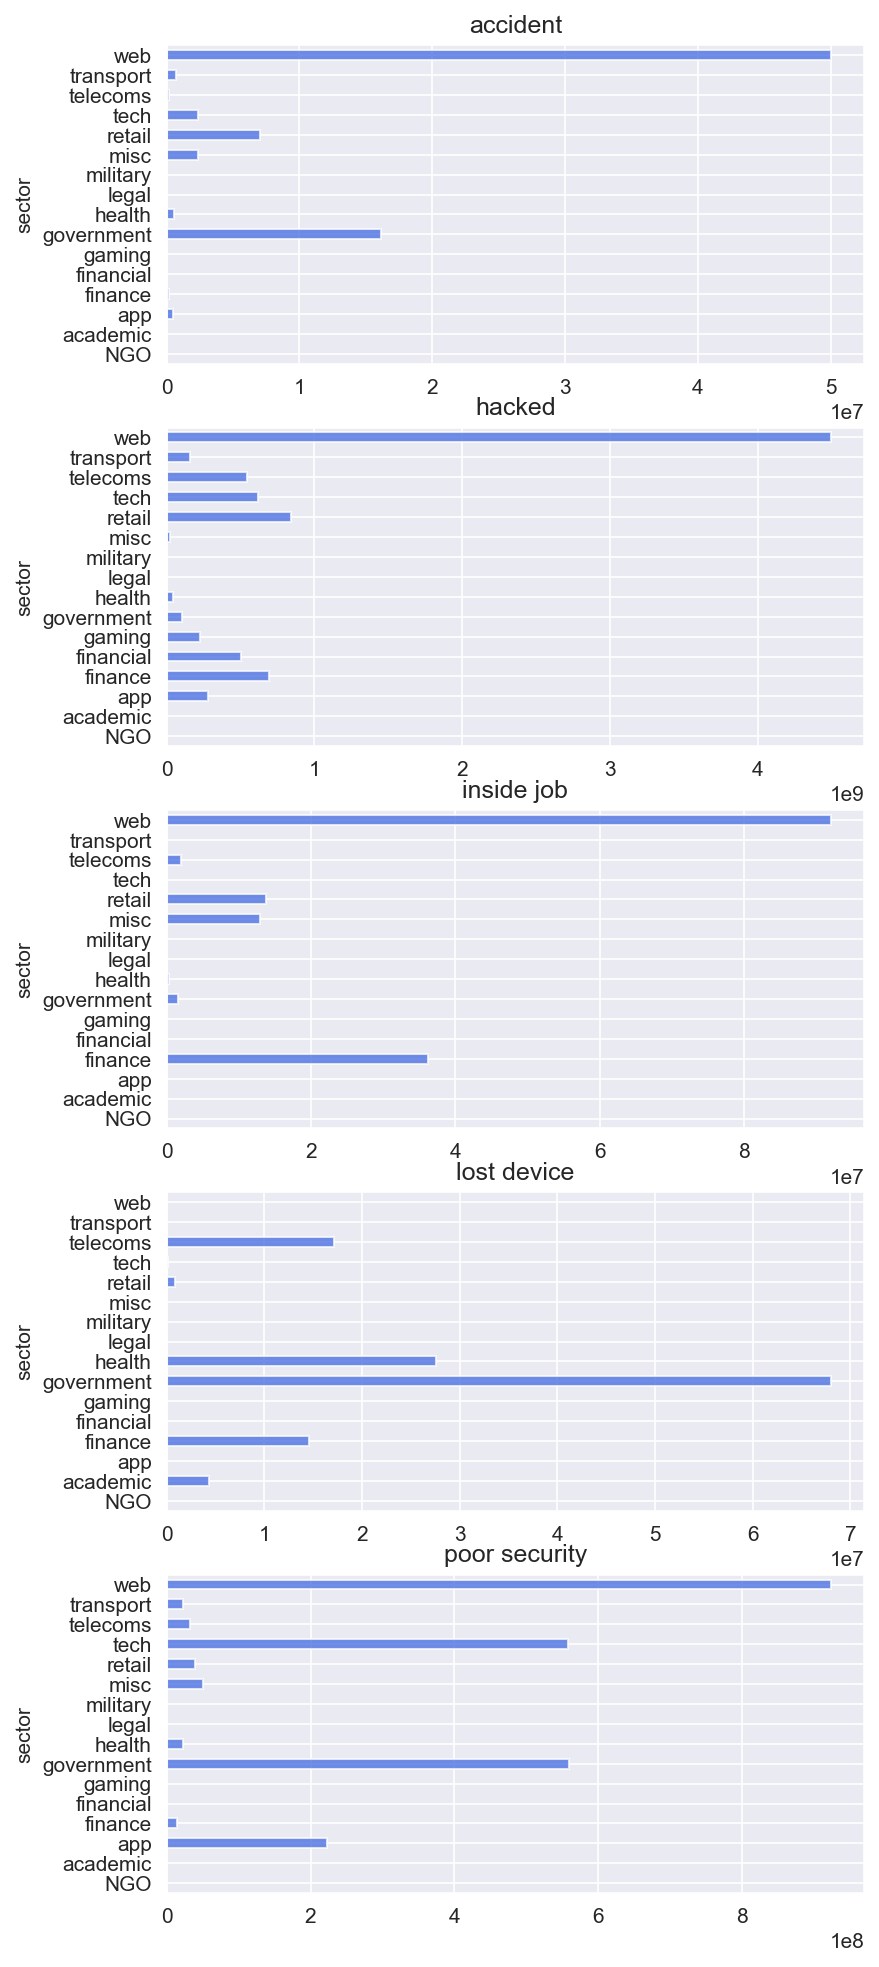

In [542]:
# Total Records Lost by Method (Separate Charts)

# Set Colour Palette
#color = ['#730517', '#f44560', '#44d1df', '#32a4a7', '#1e7069']
color = ['#f8cd82', '#f65b74', '#f72078', '#23b0bd', '#0df7db']
#color = ['#a8216b', '#f1184c', '#f36943', '#f7dc66', '#2e9599']

# Create Pivot Table (Aggregate Function = Sum)
dBreaches_method_pivot = cleaned_dBreaches_df.pivot_table('records lost',
                                                          aggfunc=np.sum,
                                                          columns='method',
                                                          index='sector',
                                                          fill_value=0)

# Set Figure Parameters and Labels
dBreaches_method_pivot.plot.barh(figsize=(6,16),
                     subplots=True,
                     color = 'royalblue',
                     alpha=0.75,
                     layout=(-1, 1),
                     sharex=False,
                     sharey=True,
                     xlabel='',
                     ylabel="sector",
                     legend=False)
                     #title="Total Records Lost")

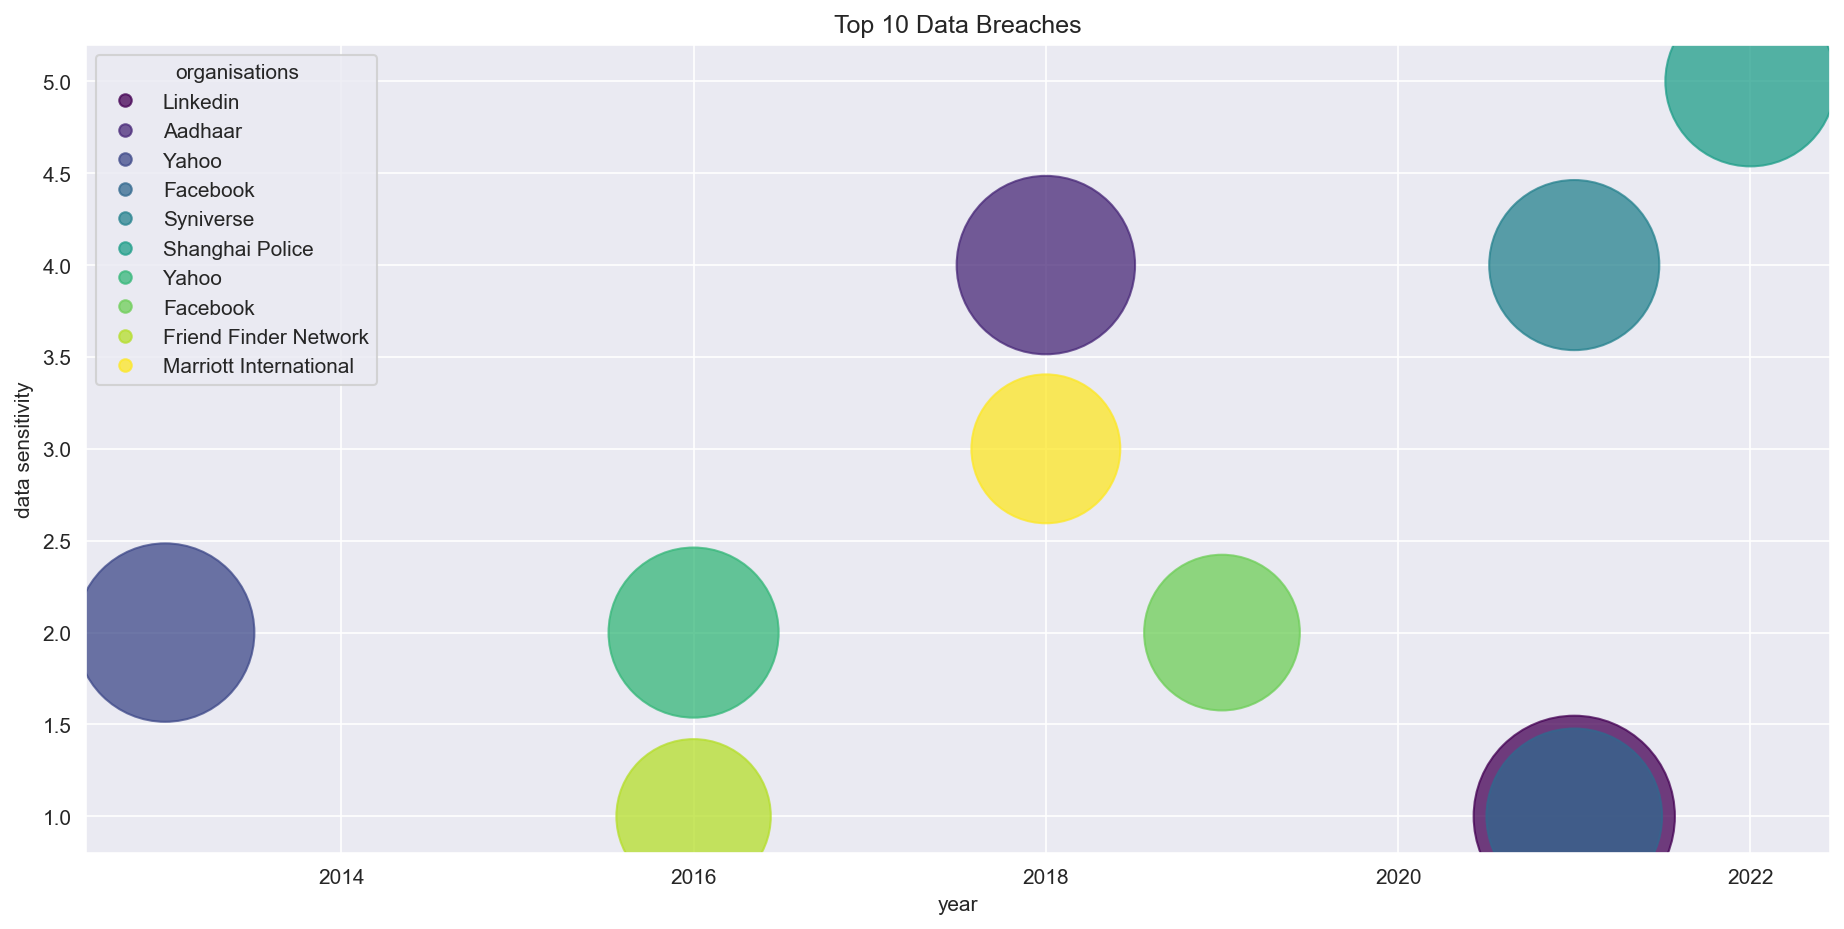

In [543]:
# Bubble Chart: Top 10 Breaches Over Time ('records lost' = Bubble Size) 

# Sort DataFrame based on 'records lost' column in Descending order
sorted_df = cleaned_dBreaches_df.sort_values(by=['records lost'], ascending=False).head(10)

# Define Axes, Bubble Sizes and Legend Labels
x1 = sorted_df['year']
y1 =  sorted_df['data sensitivity']
sizes1 = ((sorted_df['records lost'])/75000)
label1 = sorted_df['organisation'].to_list()
legend_label1 = [f'{i}' for i in label1]


# Plot Figure
plt.figure(figsize=(15, 7))

# Set Figure Parameters
scatter1 = plt.scatter(x1, y1, 
                       s=sizes1, 
                       alpha=0.75, 
                       label=label1, 
                       c=np.arange(len(label1)), 
                       cmap='viridis')

# Customise Title, Legend and Axes Labels
plt.xlabel('year')
plt.ylabel('data sensitivity')
plt.title('Top 10 Data Breaches')
plt.legend(handles=scatter1.legend_elements()[0],  # Get legend handles from scatter plot
           labels=legend_label1,
           title="organisations",
           loc='upper left')

# Show Figure
plt.show()


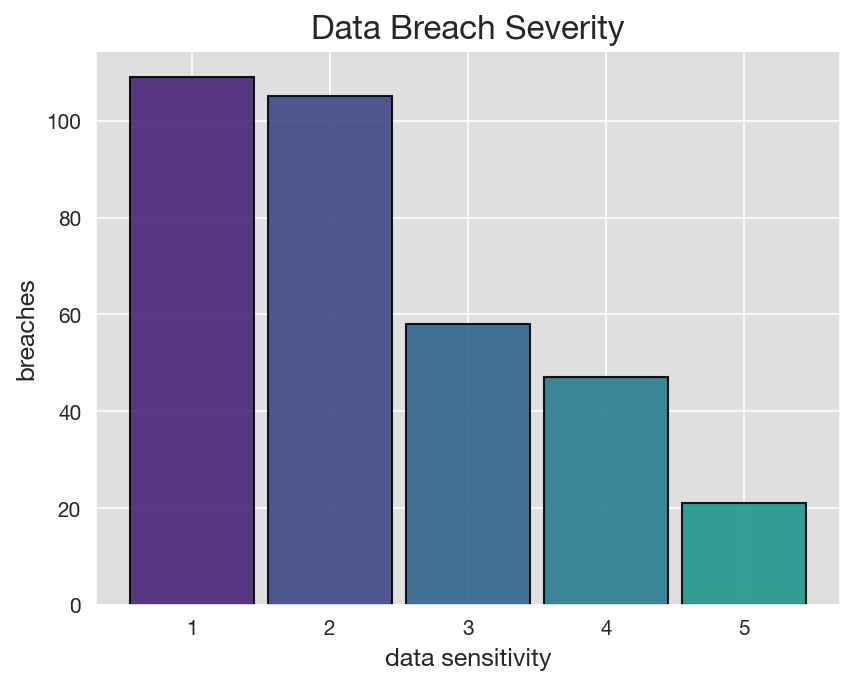

In [544]:
# Data Breach Severity

# Plot the records lost by data sensitivity
sens_records_lost = cleaned_dBreaches_df.groupby('data sensitivity')['records lost'].describe()
sens_records_lost_df = pd.DataFrame(sens_records_lost)

# Plot the data breach methods by year
method = cleaned_dBreaches_df.groupby(['method', 'year'])['records lost'].count()
method_df = pd.DataFrame(method)
method_df = method_df.reset_index()
#method_df = method_df.set_index('method')
hacked = method_df.loc[method_df['method'] == 'hacked']

# Define x and y axes
x_bar = sens_records_lost_df.index
y_bar = sens_records_lost_df['count']

# Number of Subplots in Graph (1 row and 1 column -> so only 1 subplot)
fig, ax = plt.subplots(1, 1)

# Set colour of internal plot (gray)
ax = plt.gca()
ax.set_facecolor('#dfdfdf')

# Space between left- and right-outermost bars
#ax.axes.set_xlim(0.4,12.6)

# Set Colour Palette
color = ['#482677', '#404788', '#33638d', '#287d8e', '#1f968b']

# Plot Bar Graph
ax.bar(x_bar,y_bar, color=color, width=0.9, alpha=0.9, edgecolor='black')

# Set x-ticks on x-axis (show every Month)
plt.xticks(x_bar[::])

# Set Font
font = "Helvetica Neue"

# Set Title and Axes labels
ax.set_title('Data Breach Severity', fontname=font, fontsize=16)
ax.set_xlabel("data sensitivity", fontname=font, fontsize=12)
ax.set_ylabel("breaches", fontname=font, fontsize=12)

# Set the font for axis tick labels (i.e the numbers) to be Helvetica Neue
for tick in ax.get_xticklabels():
    tick.set_fontname(font)
for tick in ax.get_yticklabels():
    tick.set_fontname(font)

# Show plot
plt.show()

## Export DataFrame to CSV

In [545]:
# Export Summary DF to csv file
cleaned_dBreaches_df.to_csv('../Resources/complete_data_breaches.csv', index=False, header=True)